In [1]:
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')

In [6]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [7]:
tips.iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips.iloc[1:4]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [11]:
tips.shape

(244, 7)

In [12]:
type(tips)

pandas.core.frame.DataFrame

In [14]:
tips[tips['sex'] == 'Female'].head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4


In [15]:
grouped = tips.groupby('sex')

In [16]:
grouped.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4


In [17]:
grouped.groups.keys()

dict_keys(['Male', 'Female'])

In [20]:
grouped.get_group('Male').head()

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [21]:
grouped['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [23]:
grouped['total_bill'].sum()

sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64

In [24]:
grouped['tip','total_bill'].sum()

,tip,total_bill
sex,,
Male,485.07,3256.82
Female,246.51,1570.95


In [25]:
import numpy

In [31]:
stats = grouped.agg({
    'total_bill' : {
        '영수증평군' : numpy.mean, 
        '영수증표준편차' : numpy.std},
    'tip' : numpy.sum
})

/Users/1003849/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [32]:
type(stats)

pandas.core.frame.DataFrame

In [33]:
stats

total_bill               tip
            영수증평군   영수증표준편차     sum
sex                                
Male    20.744076  9.246469  485.07
Female  18.056897  8.009209  246.51

In [35]:
tips.groupby(['sex', 'time']).agg({
    'total_bill' : {
        '영수증평군' : numpy.mean, 
        '영수증표준편차' : numpy.std},
    'tip' : numpy.sum
})

/Users/1003849/anaconda/lib/python3.6/site-packages/pandas/core/groupby.py:3961: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


total_bill               tip
                   영수증평군   영수증표준편차     sum
sex    time                               
Male   Lunch   18.048485  7.953435   95.11
       Dinner  21.461452  9.460974  389.96
Female Lunch   16.339143  7.500803   90.40
       Dinner  19.213077  8.202085  156.11

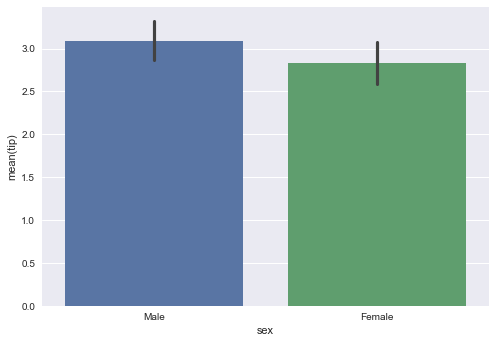

In [37]:
# sex 별 tip 평균 차이 막대그래프 표시
sns.barplot(x='sex', y='tip', data=tips)

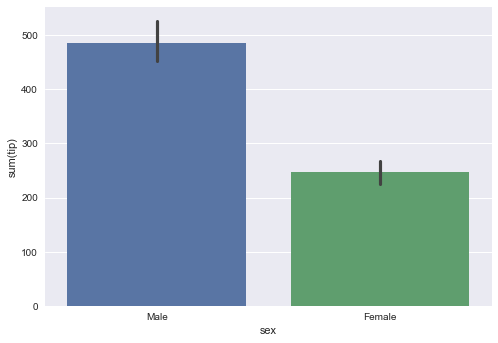

In [38]:
# 합계비교
sns.barplot(x='sex', y='tip', data=tips, estimator=sum)

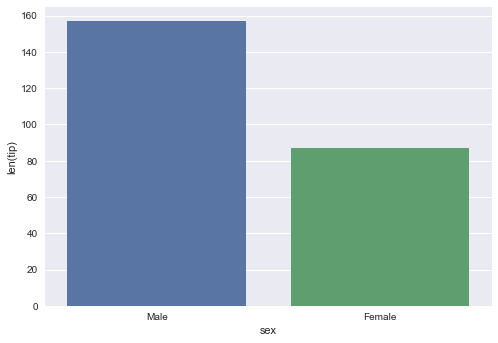

In [40]:
# 건수 비교
sns.barplot(x='sex', y='tip', data=tips, estimator=len)